### **Vecinos mas cercanos KNN**

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle

#### **Carga de dataset**

In [102]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/winequality-red.csv', sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [103]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [104]:
df['quality'] = np.select([df['quality'] <= 4,(df['quality'] > 4) & (df['quality'] <= 6), df['quality'] > 6], [0, 1, 2])
df['quality'].value_counts()

quality
1    1319
2     217
0      63
Name: count, dtype: int64

#### **Split**

In [105]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
751,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
370,6.9,0.765,0.02,2.3,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
708,7.8,0.545,0.12,2.5,0.068,11.0,35.0,0.99600,3.34,0.61,11.6
...,...,...,...,...,...,...,...,...,...,...,...
368,10.3,0.340,0.52,2.8,0.159,15.0,75.0,0.99980,3.18,0.64,9.4
48,6.4,0.400,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2
772,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4
1231,7.8,0.815,0.01,2.6,0.074,48.0,90.0,0.99621,3.38,0.62,10.8


#### **Scaling**

In [106]:
min_max_scaler = MinMaxScaler()
# Ajustamos solo con los datos de entrenamiento
min_max_scaler.fit(X_train)

X_train_scal = min_max_scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=X_train.columns)

X_test_scal = min_max_scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=X_test.columns)

X_train_scal

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
751,0.321429,0.363014,0.10,0.137931,0.128548,0.225352,0.120141,0.584435,0.433071,0.131737,0.169231
370,0.196429,0.441781,0.02,0.096552,0.085142,0.478873,0.201413,0.545521,0.653543,0.269461,0.230769
374,0.830357,0.198630,0.63,0.200000,0.128548,0.070423,0.144876,0.831865,0.212598,0.287425,0.369231
537,0.303571,0.482877,0.24,0.082759,0.120200,0.056338,0.024735,0.523495,0.496063,0.263473,0.353846
708,0.276786,0.291096,0.12,0.110345,0.093489,0.140845,0.102473,0.435389,0.472441,0.167665,0.492308
...,...,...,...,...,...,...,...,...,...,...,...
368,0.500000,0.150685,0.52,0.131034,0.245409,0.197183,0.243816,0.714391,0.346457,0.185629,0.153846
48,0.151786,0.191781,0.23,0.048276,0.090150,0.056338,0.021201,0.420705,0.472441,0.137725,0.123077
772,0.428571,0.308219,0.27,0.096552,0.116861,0.309859,0.487633,0.569016,0.417323,0.131737,0.153846
1231,0.276786,0.476027,0.01,0.117241,0.103506,0.661972,0.296820,0.450808,0.503937,0.173653,0.369231


#### **Entreno del modelo**

In [107]:
knnmodel = KNeighborsClassifier(n_neighbors=9)
knnmodel.fit(X_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### **Prediccion**

In [108]:
y_pred_test = knnmodel.predict(X_test)
y_pred_train = knnmodel.predict(X_train)

#### **Precision**

In [109]:
accuracy_score(y_test, y_pred_test)

0.803125

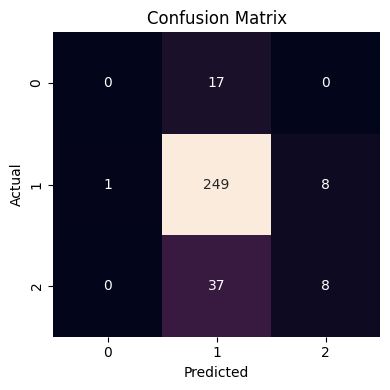

In [110]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm)

# Chart
plt.figure(figsize = (4, 4))
sns.heatmap(df_cm, annot = True, fmt = "d", cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()

#### **Observaciones** : la prediccion solo es buena para las clase 1 porque es donde mas datos hay. En las demas clases no hay informacion, entonces no se obtiene buen modelo predictivo para esas dos clases restantes.

In [111]:
report_knn= classification_report(y_test, y_pred_test)
report_knn

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        17\n           1       0.82      0.97      0.89       258\n           2       0.50      0.18      0.26        45\n\n    accuracy                           0.80       320\n   macro avg       0.44      0.38      0.38       320\nweighted avg       0.73      0.80      0.75       320\n'

#### **Optimizacion**

In [112]:
foo = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    foo.append(acc)

foo

[0.815625,
 0.809375,
 0.821875,
 0.815625,
 0.828125,
 0.8,
 0.80625,
 0.80625,
 0.803125,
 0.803125,
 0.803125,
 0.803125,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.81875,
 0.815625,
 0.815625,
 0.8125]

In [113]:
max(foo), min(foo)

(0.828125, 0.8)

([<matplotlib.axis.XTick at 0x7bb1b3c3f510>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

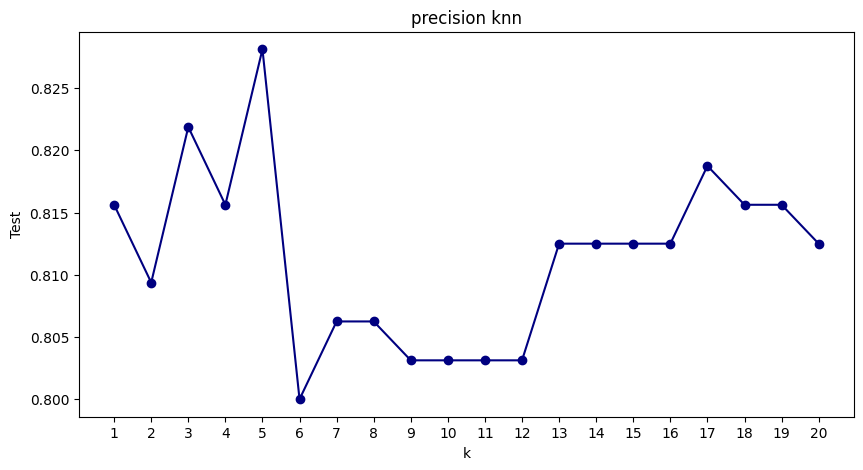

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), foo, marker='o', linestyle='-', color='navy')
plt.title("precision knn")
plt.xlabel('k')
plt.ylabel('Test')
plt.xticks(range(1, 21))

In [115]:
with open('/workspaces/GuilloMansa-MachineLearning/models/08-Knn-wine-quality.pkl', 'wb') as file:
    pickle.dump(knnmodel, file)